## DATASET:
https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('dataset/train.csv', index_col=0)
df2 = pd.read_csv('dataset/test.csv', index_col=0)

df = pd.concat([df1, df2])

In [4]:
display(df.shape)
df.head(5)

(129880, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Pre-processamento dos Dados

In [5]:
list(df.columns)

['id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

### Passando as colunas categóricas para números

In [6]:
dict(df.dtypes)

{'id': dtype('int64'),
 'Gender': dtype('O'),
 'Customer Type': dtype('O'),
 'Age': dtype('int64'),
 'Type of Travel': dtype('O'),
 'Class': dtype('O'),
 'Flight Distance': dtype('int64'),
 'Inflight wifi service': dtype('int64'),
 'Departure/Arrival time convenient': dtype('int64'),
 'Ease of Online booking': dtype('int64'),
 'Gate location': dtype('int64'),
 'Food and drink': dtype('int64'),
 'Online boarding': dtype('int64'),
 'Seat comfort': dtype('int64'),
 'Inflight entertainment': dtype('int64'),
 'On-board service': dtype('int64'),
 'Leg room service': dtype('int64'),
 'Baggage handling': dtype('int64'),
 'Checkin service': dtype('int64'),
 'Inflight service': dtype('int64'),
 'Cleanliness': dtype('int64'),
 'Departure Delay in Minutes': dtype('int64'),
 'Arrival Delay in Minutes': dtype('float64'),
 'satisfaction': dtype('O')}

In [7]:
cat_cols = []

for k,v in dict(df.dtypes).items():
    if v=='O':
        cat_cols.append(k)
        
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [8]:
for col in cat_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [9]:
df.drop(columns='id', inplace=True)
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Dropando as linhas com NaN's

In [10]:
df.dropna(
    axis='index',
    how='any',
    inplace=True
)

In [11]:
X_data = df.drop(columns='satisfaction')
colunas = X_data.columns
Y_data = df.loc[:, 'satisfaction'].to_numpy()

### Normalizando as features

In [12]:
from sklearn.preprocessing import StandardScaler

# Normalize Features
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

In [13]:
type(X_data)

numpy.ndarray

In [14]:
X_data = pd.DataFrame(X_data, columns = colunas)
X_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.014931,-0.473495,-1.748219,1.494583,2.263223,-0.731999,0.204220,0.617410,0.173519,-1.546271,...,1.181364,1.230701,0.479240,-0.266751,0.311941,0.547933,1.153847,1.304624,0.273026,0.075623
1,1.014931,2.111957,-0.954439,-0.669083,-0.955479,-0.957550,0.204220,-0.692535,0.173519,0.018061,...,-1.850863,-1.767475,-1.851712,1.252860,-0.535461,-1.821471,0.303947,-1.740400,-0.359673,-0.236345
2,-0.985288,-0.473495,-0.888290,-0.669083,-0.955479,-0.048329,-0.548095,-0.692535,-0.539923,-0.764105,...,1.181364,1.230701,0.479240,-0.266751,0.311941,0.547933,0.303947,1.304624,-0.386036,-0.392329
3,-0.985288,-0.473495,-0.954439,-0.669083,-0.955479,-0.629749,-0.548095,1.272383,1.600402,1.582393,...,-1.092806,-1.017931,-1.074728,1.252860,-0.535461,-1.821471,0.303947,-0.979144,-0.096049,-0.158353
4,1.014931,-0.473495,1.426902,-0.669083,-0.955479,-0.978601,0.204220,-0.037562,0.173519,0.018061,...,1.181364,-0.268387,-0.297744,0.493055,0.311941,-0.241868,-0.545953,-0.217888,-0.386036,-0.392329


In [15]:
display(X_data.shape)
display(Y_data.shape)

(129487, 22)

(129487,)

In [16]:
import numpy as np
res = np.append(X_data, Y_data[:, None], axis=1)
display(res.shape)

(129487, 23)

In [17]:
df = pd.DataFrame(res, columns = df.columns)

In [18]:
df.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.014931,-0.473495,-1.748219,1.494583,2.263223,-0.731999,0.204220,0.617410,0.173519,-1.546271,...,1.230701,0.479240,-0.266751,0.311941,0.547933,1.153847,1.304624,0.273026,0.075623,0.0
1,1.014931,2.111957,-0.954439,-0.669083,-0.955479,-0.957550,0.204220,-0.692535,0.173519,0.018061,...,-1.767475,-1.851712,1.252860,-0.535461,-1.821471,0.303947,-1.740400,-0.359673,-0.236345,0.0
2,-0.985288,-0.473495,-0.888290,-0.669083,-0.955479,-0.048329,-0.548095,-0.692535,-0.539923,-0.764105,...,1.230701,0.479240,-0.266751,0.311941,0.547933,0.303947,1.304624,-0.386036,-0.392329,1.0


## Separando os conjunto de Dados

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

knn_scores = []
knn_times = []
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(X_data, Y_data)

5

## Modelo 1: k-NN

In [20]:

from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import time

for train_index, test_index in tqdm(sss.split(X_data, Y_data)):
    
    X_train, X_test = X_data.loc[train_index, :], X_data.loc[test_index, :]
    y_train, y_test = Y_data[train_index], Y_data[test_index]
    
    knn_model = KNeighborsClassifier(n_neighbors=3)
    t0 = time.time()
    knn_model.fit(X_train, y_train)
    t1 = time.time()
    t = t1-t0
    knn_times.append(t)
    score = knn_model.score(X_test, y_test)
    print(score)
    knn_scores.append(score)

1it [00:35, 35.40s/it]

0.9268283265116998


2it [01:10, 35.49s/it]

0.9285272994053595


3it [01:46, 35.53s/it]

0.9285659124256699


4it [02:22, 35.55s/it]

0.9259788400648699


5it [02:57, 35.57s/it]

0.9260174530851804


In [21]:
display(knn_scores)
display(knn_times)

[0.9268283265116998,
 0.9285272994053595,
 0.9285659124256699,
 0.9259788400648699,
 0.9260174530851804]

[0.007997989654541016,
 0.008002519607543945,
 0.008001327514648438,
 0.007001399993896484,
 0.009002923965454102]

## Modelo 2: SVM

In [22]:
from sklearn.svm import SVC

svm_scores = []
svm_times = []

for train_index, test_index in tqdm(sss.split(X_data, Y_data)):
    X_train, X_test = X_data.loc[train_index, :], X_data.loc[test_index, :]
    y_train, y_test = Y_data[train_index], Y_data[test_index]
    
    svm_model = SVC(gamma='auto')
    t0 = time.time()
    svm_model.fit(X_train, y_train)
    t1 = time.time()
    t = t1-t0
    svm_times.append(t)

    score = svm_model.score(X_test, y_test)
    print(score)
    svm_scores.append(score)

1it [04:08, 248.54s/it]

0.9561356089273303


2it [08:09, 243.89s/it]

0.956792030272608


3it [12:17, 246.02s/it]

0.9577187427600586


4it [16:29, 248.19s/it]

0.9569078693335392


5it [20:50, 250.07s/it]

0.9564445130898139


In [23]:
display(svm_scores)
display(svm_times)

[0.9561356089273303,
 0.956792030272608,
 0.9577187427600586,
 0.9569078693335392,
 0.9564445130898139]

[204.5301809310913,
 196.73824739456177,
 203.38506650924683,
 206.79951858520508,
 216.20037484169006]

## Modelo 3: Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

randforest_scores = []
randforest_times = []

for train_index, test_index in tqdm(sss.split(X_data, Y_data)):
    X_train, X_test = X_data.loc[train_index, :], X_data.loc[test_index, :]
    y_train, y_test = Y_data[train_index], Y_data[test_index]
    
    randforest_model = RandomForestClassifier(random_state=0)
    t0 = time.time()
    randforest_model.fit(X_train, y_train)
    t1 = time.time()
    t = t1-t0
    randforest_times.append(t)
    score = randforest_model.score(X_test, y_test)
    print(score)
    randforest_scores.append(score)

1it [00:10, 10.62s/it]

0.9632017916441424


2it [00:21, 10.69s/it]

0.9644760213143873


3it [00:32, 10.73s/it]

0.9640512780909722


4it [00:43, 10.90s/it]

0.9626225963394857


5it [00:53, 10.79s/it]

0.962738435400417


In [25]:
display(randforest_scores)
display(randforest_times)

[0.9632017916441424,
 0.9644760213143873,
 0.9640512780909722,
 0.9626225963394857,
 0.962738435400417]

[10.185100078582764,
 10.29421877861023,
 10.351487874984741,
 10.716111898422241,
 10.236194372177124]

In [26]:
from sklearn.metrics import classification_report
y_pred = randforest_model.predict(X_test)
cr = classification_report(y_test, y_pred, output_dict=True)

In [27]:
cr

{'0': {'precision': 0.9541229584384544,
  'recall': 0.9812905428473881,
  'f1-score': 0.9675160736526744,
  'support': 14645},
 '1': {'precision': 0.9747139165743817,
  'recall': 0.938594152670399,
  'f1-score': 0.9563130970166145,
  'support': 11253},
 'accuracy': 0.962738435400417,
 'macro avg': {'precision': 0.964418437506418,
  'recall': 0.9599423477588935,
  'f1-score': 0.9619145853346445,
  'support': 25898},
 'weighted avg': {'precision': 0.9630699833787427,
  'recall': 0.962738435400417,
  'f1-score': 0.9626482423110425,
  'support': 25898}}

## Modelo 4: xGBoost

In [20]:
import xgboost
from tqdm import tqdm
import time

xgboost_scores = []
xgboost_times = []

for train_index, test_index in tqdm(sss.split(X_data, Y_data)):
    X_train, X_test = X_data.loc[train_index, :], X_data.loc[test_index, :]
    y_train, y_test = Y_data[train_index], Y_data[test_index]
    
    xgboost_model = xgboost.XGBClassifier(use_label_encoder=False)
    xgboost_model.fit(X_train, y_train)
    t0 = time.time()
    xgboost_model.fit(X_train, y_train)
    t1 = time.time()
    t = t1-t0
    xgboost_times.append(t)
    score = xgboost_model.score(X_test, y_test)
    print(score)
    xgboost_scores.append(score)

0it [00:00, ?it/s]

[12:04:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1it [00:03,  3.80s/it]

0.9641285041315931
[12:04:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2it [00:07,  3.80s/it]

0.9652868947409067
[12:04:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


3it [00:11,  3.77s/it]

0.964282956212835
[12:04:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


4it [00:15,  3.79s/it]

0.9641671171519036
[12:04:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:04:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


5it [00:18,  3.78s/it]

0.9645146343346976


In [21]:
display(xgboost_scores)
display(xgboost_times)

[0.9641285041315931,
 0.9652868947409067,
 0.964282956212835,
 0.9641671171519036,
 0.9645146343346976]

[1.8135523796081543,
 1.8782625198364258,
 1.821077823638916,
 1.7780532836914062,
 1.8240373134613037]

## Explicabilidade do Modelo: xgBoost

In [29]:
import shap

explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_train)

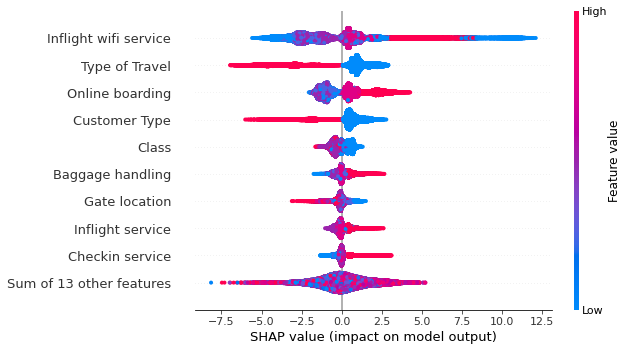

In [30]:
shap.plots.beeswarm(shap_values)

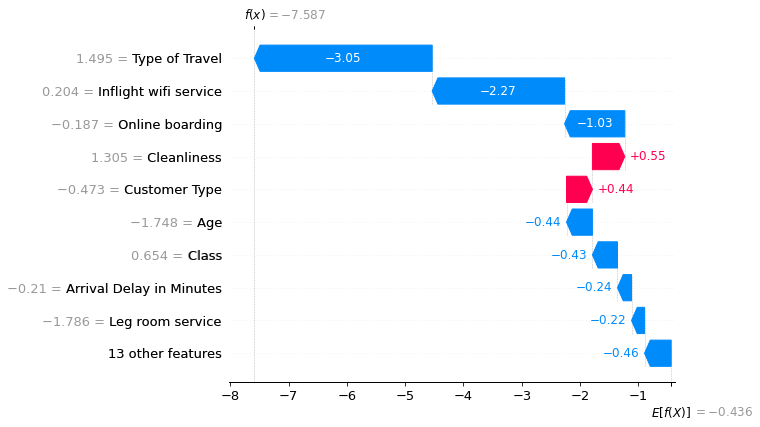

In [31]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

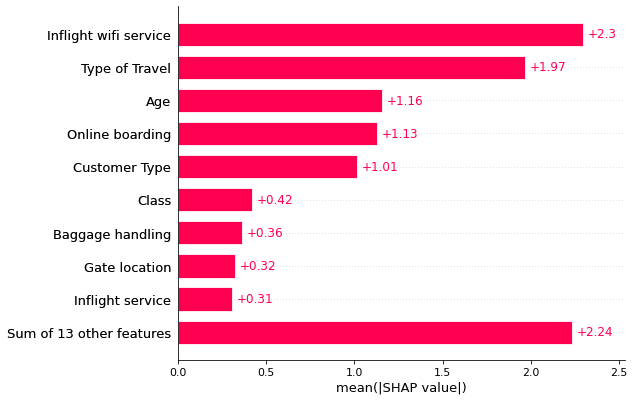

In [32]:
shap.plots.bar(shap_values)